In [1]:
import pandas as pd

df = pd.read_csv("E:/Downloads/validation_new.csv")
df.head()

,Price,Competitor Price,Discount,Elasticity Index,Storage Cost,Return Rate (%),Customer Reviews,Demand
0,244.99,255.88,0.00,1.21,8.31,23.14,4.77,1720
1,581.85,1588.73,0.14,1.15,11.34,2.13,3.49,484
2,932.98,933.96,0.09,1.12,13.67,12.61,4.07,1102
3,474.58,1471.14,0.28,0.60,28.41,2.92,2.85,1243
4,958.18,1997.32,0.15,1.26,18.70,20.68,4.61,50


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15 non-null     float64
 1   Competitor Price  15 non-null     float64
 2   Discount          15 non-null     float64
 3   Elasticity Index  15 non-null     float64
 4   Storage Cost      15 non-null     float64
 5   Return Rate (%)   15 non-null     float64
 6   Customer Reviews  15 non-null     float64
 7   Demand            15 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 1.1 KB


In [5]:
x = df.drop("Demand",axis = 1)
y = df['Demand']

In [6]:
import joblib

model = joblib.load("rf_model_on_variety_synthetic_data.joblib")

In [7]:
x

,Price,Competitor Price,Discount,Elasticity Index,Storage Cost,Return Rate (%),Customer Reviews
0,244.99,255.88,0.00,1.21,8.31,23.14,4.77
1,581.85,1588.73,0.14,1.15,11.34,2.13,3.49
2,932.98,933.96,0.09,1.12,13.67,12.61,4.07
3,474.58,1471.14,0.28,0.60,28.41,2.92,2.85
4,958.18,1997.32,0.15,1.26,18.70,20.68,4.61
5,105.50,100.00,0.00,1.10,5.20,4.50,4.20
6,89.99,110.00,0.10,0.95,4.80,1.20,4.80
7,1250.00,1300.00,0.05,2.40,45.00,0.50,4.95
8,45.00,42.00,0.00,0.75,2.10,8.00,3.10
9,210.00,205.00,0.20,1.30,12.40,15.60,3.80


In [10]:
y_pred = model.predict(x)
y_pred

array([1829.1 , 1389.2 , 1135.65, 1952.3 , 1050.8 , 2045.3 , 2304.6 ,
        182.  , 1877.55, 2024.85,  980.25, 2029.95, 2171.75,   73.4 ,
       1963.  ])

In [9]:
y

0     1720
1      484
2     1102
3     1243
4       50
5      610
6     2100
7       85
8     3200
9      950
10     310
11    1450
12    1850
13      35
14    1120
Name: Demand, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

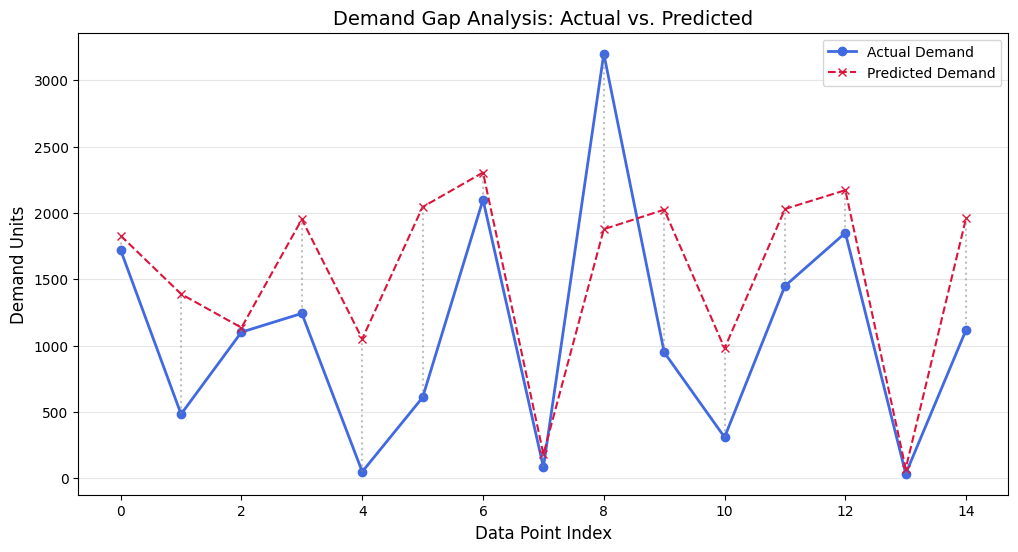

In [18]:
plt.figure(figsize=(12, 6))

# Plotting the Actual values
plt.plot(range(len(y)), y, label='Actual Demand', marker='o', color='royalblue', linewidth=2)

# Plotting the Predicted values
plt.plot(range(len(y_pred)), y_pred, label='Predicted Demand', marker='x', color='crimson', linestyle='--')

# Adding "Error Bars" to show the gap explicitly
for i in range(len(y)):
    plt.vlines(x=i, ymin=min(y.iloc[i], y_pred[i]), ymax=max(y.iloc[i], y_pred[i]), 
               color='gray', linestyle=':', alpha=0.5)

plt.title('Demand Gap Analysis: Actual vs. Predicted', fontsize=14)
plt.xlabel('Data Point Index', fontsize=12)
plt.ylabel('Demand Units', fontsize=12)
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.show()